### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [548]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [551]:
data = pd.read_csv('data/coupons.csv')

In [553]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [555]:
data.head()
# data[data['Bar'].notna()]['Bar'].value_counts()
# data[data['CoffeeHouse'].notna()]['CoffeeHouse'].value_counts()
# data[data['CarryAway'].notna()]['CarryAway'].value_counts()
# data[data['RestaurantLessThan20'].notna()]['RestaurantLessThan20'].value_counts()
# data[data['Restaurant20To50'].notna()]['Restaurant20To50'].value_counts()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [558]:
# There might be some duplicate rows
data.duplicated().sum() / data.shape[0] * 100

0.5834121728161463

In [560]:
# what are the percentages of the missing values by column
missing_values_percent = (data.isnull().sum() / data.shape[0]) * 100
missing_values_percent = missing_values_percent[missing_values_percent > 0].sort_values()
print(missing_values_percent)

Bar                      0.843582
RestaurantLessThan20     1.024913
CarryAway                1.190476
Restaurant20To50         1.490066
CoffeeHouse              1.710817
car                     99.148534
dtype: float64


3. Decide what to do about your missing data -- drop, replace, other...

In [563]:
# remove the duplicate
data_no_duplicates = data.drop_duplicates()
# drop column 'car' as it has >99% null values
data_no_car = data_no_duplicates.drop(columns='car')
data_no_car.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               150
RestaurantLessThan20    129
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [565]:
# data[data['Bar'].notna()]['Bar'].value_counts()
# data[data['CoffeeHouse'].notna()]['CoffeeHouse'].value_counts()
# data[data['CarryAway'].notna()]['CarryAway'].value_counts()
# data[data['RestaurantLessThan20'].notna()]['RestaurantLessThan20'].value_counts()
# data[data['Restaurant20To50'].notna()]['Restaurant20To50'].value_counts()

# the columns that are missing values are populated with string values and values have different distributions. 
# The number of rows containing null values is also very low. So we can drop these rows.
data_clean = data_no_car.dropna()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-null  ob

4. What proportion of the total observations chose to accept the coupon?

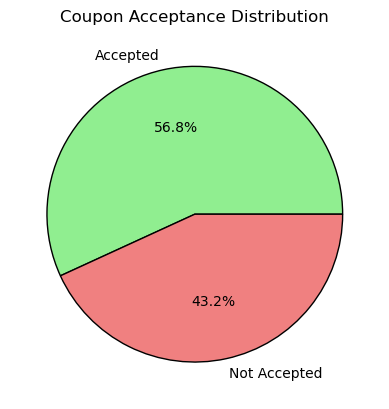

In [568]:
accept_value_counts = data_clean["Y"].value_counts()
labels = ["Accepted", "Not Accepted"]
plt.pie(accept_value_counts, labels=labels, wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', colors=['lightgreen','lightcoral'])
plt.title("Coupon Acceptance Distribution")
plt.show()

5. Use a bar plot to visualize the `coupon` column.

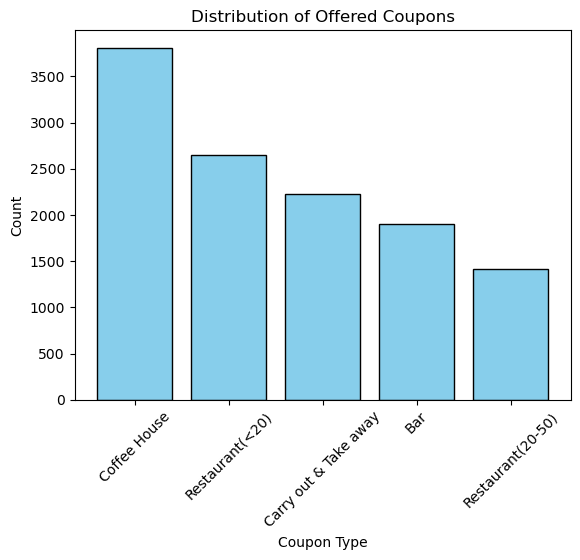

In [571]:
coupon_counts = data_clean["coupon"].value_counts()
plt.bar(coupon_counts.index, coupon_counts.values, color='skyblue', edgecolor='black')

plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.title("Distribution of Offered Coupons")
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

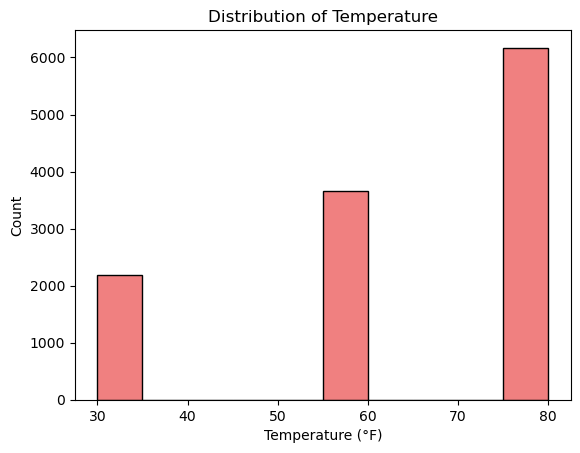

In [574]:
plt.hist(data_clean["temperature"], color='lightcoral', edgecolor='black')

plt.xlabel("Temperature (°F)")
plt.ylabel("Count")
plt.title("Distribution of Temperature")
plt.show()

# Looks like the town saw most visitors when the temperatures were higher pointing towards more tourists during summer.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [581]:
data_bar = data_clean.query('coupon == "Bar"')
data_bar.shape

(1906, 25)

2. What proportion of bar coupons were accepted?


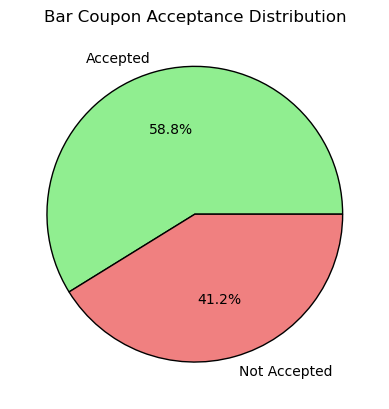

In [584]:
accept_value_counts_bar = data_bar["Y"].value_counts()
labels = ["Accepted", "Not Accepted"]
plt.pie(accept_value_counts_bar, labels=labels, wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', colors=['lightgreen','lightcoral'])
plt.title("Bar Coupon Acceptance Distribution")
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
   

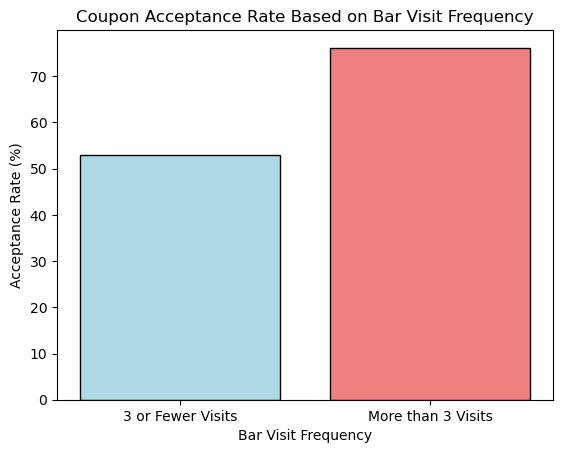

In [587]:
# coupon acceptance rate for those who go to a bar 3 or fewer times
lt3_visits = data_bar[data_bar["Bar"].isin(["0", "less1", "1~3"])]
lt3_acceptance_rate = (lt3_visits["Y"].sum() / lt3_visits.shape[0]) * 100

# acceptance rate for those who go to a bar more than 3 times
gt3_visits = data_bar[data_bar["Bar"].isin(["4~8", "gt8"])]
gt3_acceptance_rate = (gt3_visits["Y"].sum() / gt3_visits.shape[0]) * 100

bar_acceptance_rates = pd.DataFrame({
    "Frequency": ["3 or Fewer Visits", "More than 3 Visits"],
    "Acceptance Rate (%)": [lt3_acceptance_rate, gt3_acceptance_rate]
})

plt.bar(bar_acceptance_rates["Frequency"], bar_acceptance_rates["Acceptance Rate (%)"], color=['lightblue', 'lightcoral'], edgecolor='black')

plt.xlabel("Bar Visit Frequency")
plt.ylabel("Acceptance Rate (%)")
plt.title("Coupon Acceptance Rate Based on Bar Visit Frequency")
plt.show()



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


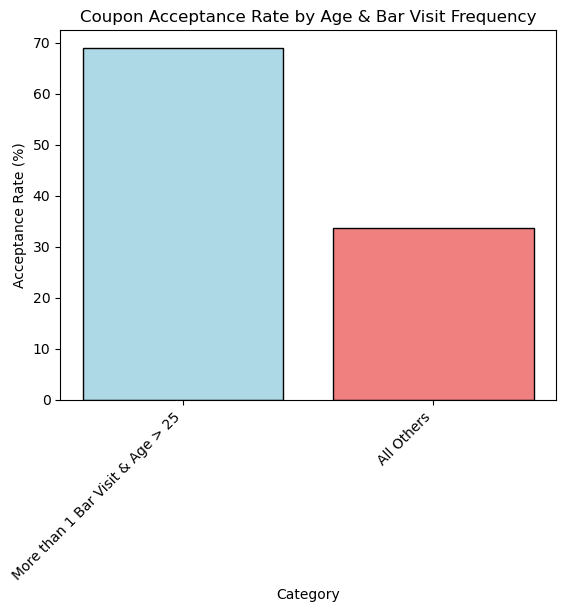

In [590]:
# Filter drivers who go to a bar more than once a month and are over 25
filtered_df = data_bar[
    (data_bar["Bar"].isin(["1~3", "4~8", "gt8"])) & 
    (~data_bar["age"].isin(["21", "below21"]))
]

filtered_acceptance_rate = (filtered_df["Y"].sum() / filtered_df.shape[0]) * 100


others_df = data_bar.drop(filtered_df.index)  # Exclude the filtered group
others_acceptance_rate = (others_df["Y"].sum() / others_df.shape[0]) * 100

comparison_df = pd.DataFrame({
    "Category": ["More than 1 Bar Visit & Age > 25", "All Others"],
    "Acceptance Rate (%)": [filtered_acceptance_rate, others_acceptance_rate]
})

plt.bar(comparison_df["Category"], comparison_df["Acceptance Rate (%)"], color=['lightblue', 'lightcoral'], edgecolor='black')

plt.xlabel("Category")
plt.ylabel("Acceptance Rate (%)")
plt.title("Coupon Acceptance Rate by Age & Bar Visit Frequency")

plt.xticks(rotation=45, ha='right')

plt.show()

#==> Based on the bar chart above, there deifinitely difference that people with higher age and whoi frequent to bars 
# are more likely to accept Bar coupons.



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


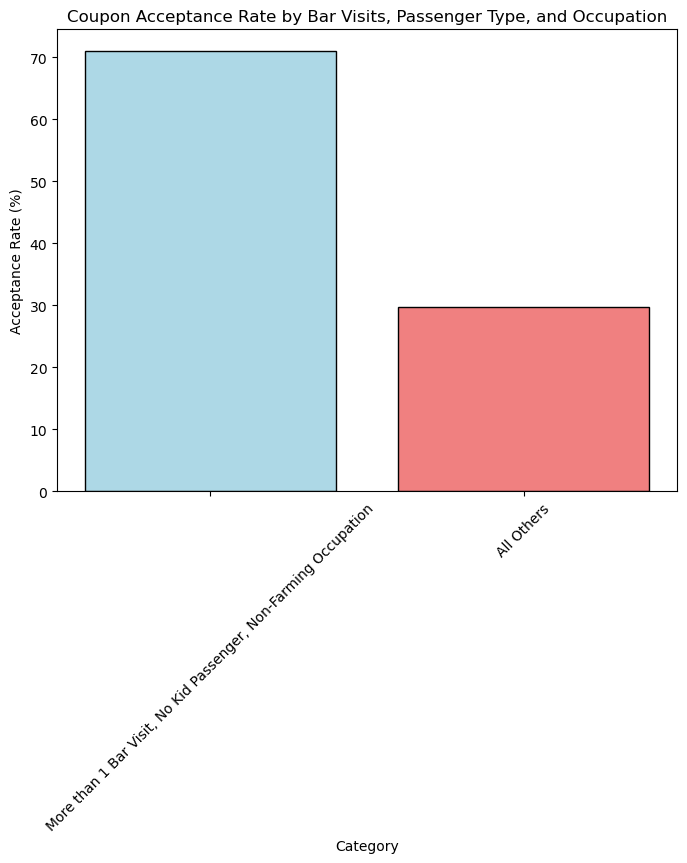

In [593]:
filtered_df = data_bar[
    (data_bar["Bar"].isin(["1~3", "4~8", "gt8"])) & 
    (data_bar["passanger"] != "Kid(s)") & 
    (data_bar["occupation"] != "Farming, Fishing, and Forestry")
]

# Calculate acceptance rate for this group
filtered_acceptance_rate = (filtered_df["Y"].sum() / filtered_df.shape[0]) * 100

# Calculate acceptance rate for all others
others_df = data_bar.drop(filtered_df.index)  # Exclude the filtered group
others_acceptance_rate = (others_df["Y"].sum() / others_df.shape[0]) * 100


comparison_df = pd.DataFrame({
    "Category": ["More than 1 Bar Visit, No Kid Passenger, Non-Farming Occupation", "All Others"],
    "Acceptance Rate (%)": [filtered_acceptance_rate, others_acceptance_rate]
})


plt.figure(figsize=(8, 6))
plt.bar(comparison_df["Category"], comparison_df["Acceptance Rate (%)"], color=['lightblue', 'lightcoral'], edgecolor='black')

plt.xlabel("Category")
plt.ylabel("Acceptance Rate (%)")
plt.title("Coupon Acceptance Rate by Bar Visits, Passenger Type, and Occupation")

plt.xticks(rotation=45)
plt.show()

# ==> Similar to previous comparisons, 
# 1. people who frequent to bars (more than 1 visit a month), 
# 2. have no kids in the car as passenger
# 3. have occupations other than farming, fishing, or forestry
# these are good criteria to club together which indicate higher Bar coupon acceptance rate.



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



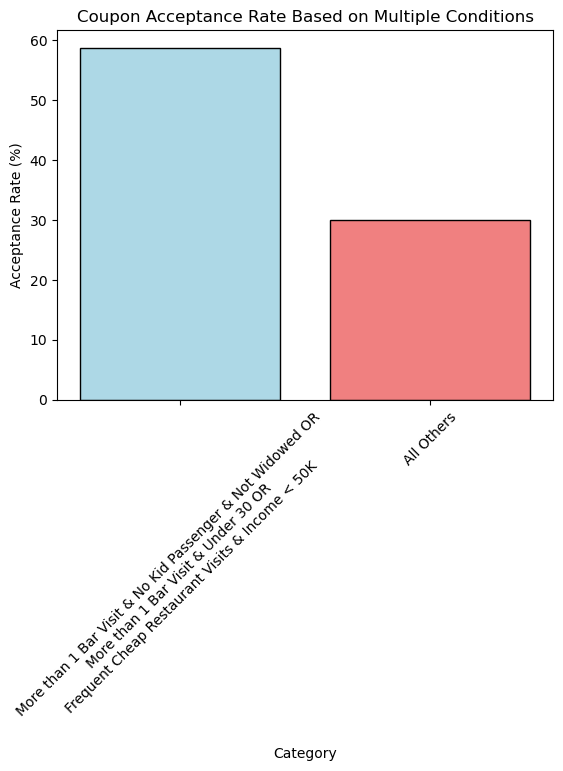

In [596]:
low_income_categories = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]

# Filter drivers based on the three conditions
filtered_df = data_bar[
    ((data_bar["Bar"].isin(["1~3", "4~8", "gt8"])) & 
     (data_bar["passanger"] != "Kid(s)") & 
     (data_bar["maritalStatus"] != "Widowed")) |
    
    ((data_bar["Bar"].isin(["1~3", "4~8", "gt8"])) & 
     (data_bar["age"].isin(["below21", "21", "26"]))) |
    
    ((data_bar["RestaurantLessThan20"].isin(["4~8", "gt8"])) & 
     (data_bar["income"].isin(low_income_categories)))
]

# Calculate acceptance rate for this group
filtered_acceptance_rate = (filtered_df["Y"].sum() / filtered_df.shape[0]) * 100

# Calculate acceptance rate for all others
others_df = data_bar.drop(filtered_df.index)  # Exclude the filtered group
others_acceptance_rate = (others_df["Y"].sum() / others_df.shape[0]) * 100

comparison_df = pd.DataFrame({
    "Category": [
        "More than 1 Bar Visit & No Kid Passenger & Not Widowed OR\nMore than 1 Bar Visit & Under 30 OR\nFrequent Cheap Restaurant Visits & Income < 50K", 
        "All Others"
    ],
    "Acceptance Rate (%)": [filtered_acceptance_rate, others_acceptance_rate]
})

plt.bar(comparison_df["Category"], comparison_df["Acceptance Rate (%)"], color=['lightblue', 'lightcoral'], edgecolor='black')

plt.xlabel("Category")
plt.ylabel("Acceptance Rate (%)")
plt.title("Coupon Acceptance Rate Based on Multiple Conditions")
plt.xticks(rotation=45)
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

==> Based on analysis of the Bar coupons subset of the dataset, I see following criteria that influence the coupon acceptance rates:
1. Bar visiting frequency: Individuals who frequent bars and restaurents are more likely to accept the Bar coupons.
2. Restaurent visiting Frequency: Those who go to cheap restaurants (<$20/person) show a moderately higher acceptance rate, indicating they may be more responsive to discounts and deals in general.
3. Age: Drivers under 30 show higher acceptance rate while older drivers especially those  have family responsibilities or who are widowed (alone) tend to avoid accepting Bar coupons.
4. Having Kids as passenger: Drivers with kids as a passenger have really low Bar coupon acceptance rate. They drive responsibly!
5. Income: Lower-income drivers (income < 50K) who dine at inexpensive restaurants often are more likely to accept bar coupons. While for higher-income drivers coupons or small discounts on bar expenses are not compelling enough.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

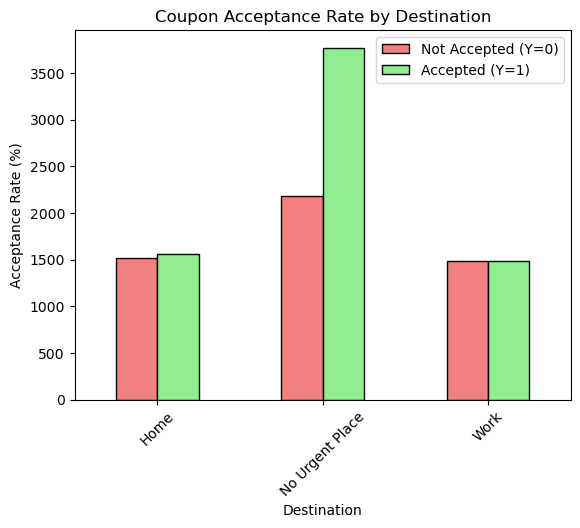

In [601]:
# Simple plot - 1: By destination. Drivers heading to No urgent place or home accept more coupons

acceptance_rate_by_destination = data_clean.groupby(["destination", "Y"]).size().unstack()

acceptance_rate_by_destination.plot(kind="bar", color=['lightcoral', 'lightgreen'], edgecolor='black')

plt.xlabel("Destination")
plt.ylabel("Acceptance Rate (%)")
plt.title("Coupon Acceptance Rate by Destination")
plt.legend(["Not Accepted (Y=0)", "Accepted (Y=1)"])
plt.xticks(rotation=45)

plt.show()

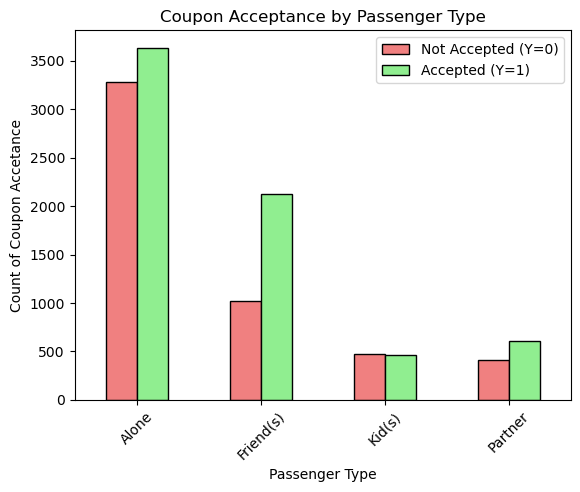

In [603]:
# Simple plot 2: By passengers: Although the count of alone drivers is high, 
# drivers driving with friends or partner are more likely to accept coupons 
# while drivers traveling with kids are less likely to accept any coupons.

acceptance_rate_by_passenger = data_clean.groupby(["passanger", "Y"]).size().unstack()

acceptance_rate_by_passenger.plot(kind="bar", color=['lightcoral', 'lightgreen'], edgecolor='black')

plt.xlabel("Passenger Type")
plt.ylabel("Count of Coupon Accetance")
plt.title("Coupon Acceptance by Passenger Type")
plt.legend(["Not Accepted (Y=0)", "Accepted (Y=1)"])
plt.xticks(rotation=45)

plt.show()


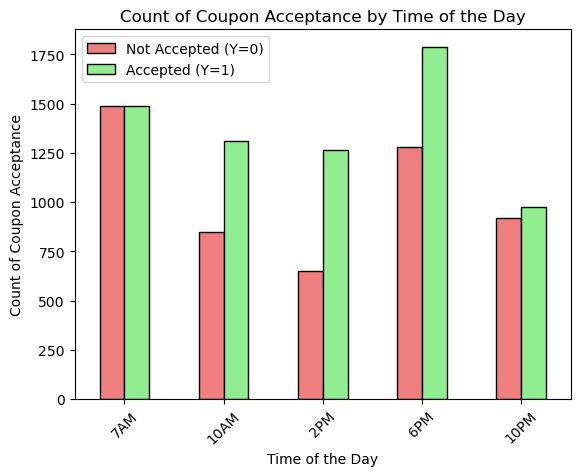

In [605]:
# Simple plot 3: By time of the day: Certain times of the day like 6pm the rate of coupon acceptance is higher.

time_order = ["7AM", "10AM", "2PM", "6PM", "10PM"]
acceptance_counts = data_clean.groupby(["time", "Y"]).size().unstack()
acceptance_counts = acceptance_counts.reindex(time_order)

acceptance_counts.plot(kind="bar", color=["lightcoral", "lightgreen"], edgecolor="black")

plt.xlabel("Time of the Day")
plt.ylabel("Count of Coupon Acceptance")
plt.title("Count of Coupon Acceptance by Time of the Day")
plt.legend(["Not Accepted (Y=0)", "Accepted (Y=1)"])
plt.xticks(rotation=45)

plt.show()

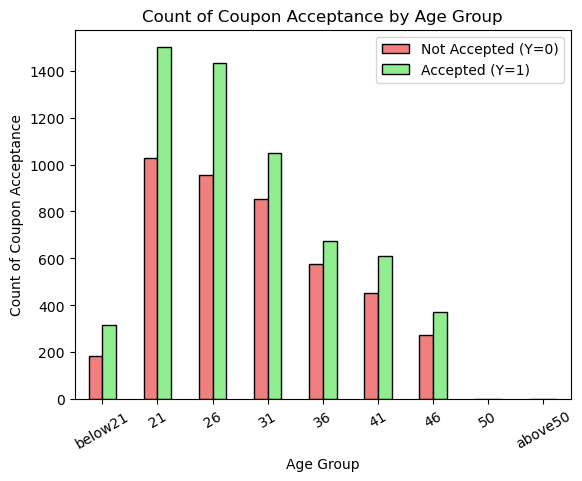

In [607]:
# Simple plot 4: By age: Younger drivers tend to accept coupons more readily.

age_order = ["below21", "21", "26", "31", "36", "41", "46", "50", "above50"]

acceptance_counts_age = data_clean.groupby(["age", "Y"]).size().unstack()
acceptance_counts_age = acceptance_counts_age.reindex(age_order)

acceptance_counts_age.plot(kind="bar", color=["lightcoral", "lightgreen"], edgecolor="black")

plt.xlabel("Age Group")
plt.ylabel("Count of Coupon Acceptance")
plt.title("Count of Coupon Acceptance by Age Group")
plt.legend(["Not Accepted (Y=0)", "Accepted (Y=1)"])

plt.xticks(rotation=30)
plt.show()


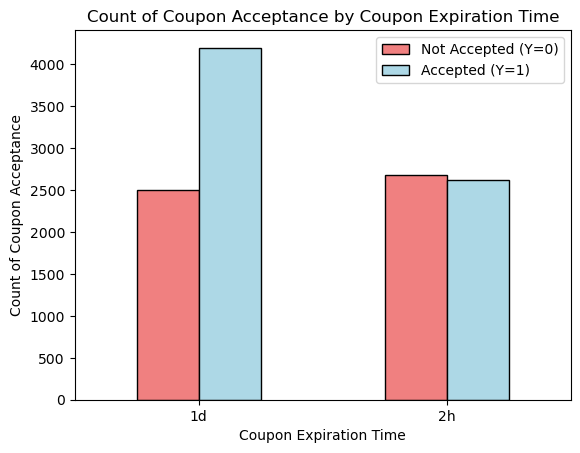

In [609]:
# Simple plot 5: By Coupon Expiration: Coupons valid for longer time get accepted more.

acceptance_counts_expiration = data_clean.groupby(["expiration", "Y"]).size().unstack()
acceptance_counts_expiration.plot(kind="bar", color=["lightcoral", "lightblue"], edgecolor="black")

plt.xlabel("Coupon Expiration Time")
plt.ylabel("Count of Coupon Acceptance")
plt.title("Count of Coupon Acceptance by Coupon Expiration Time")
plt.legend(["Not Accepted (Y=0)", "Accepted (Y=1)"])
plt.xticks(rotation=0)
plt.show()

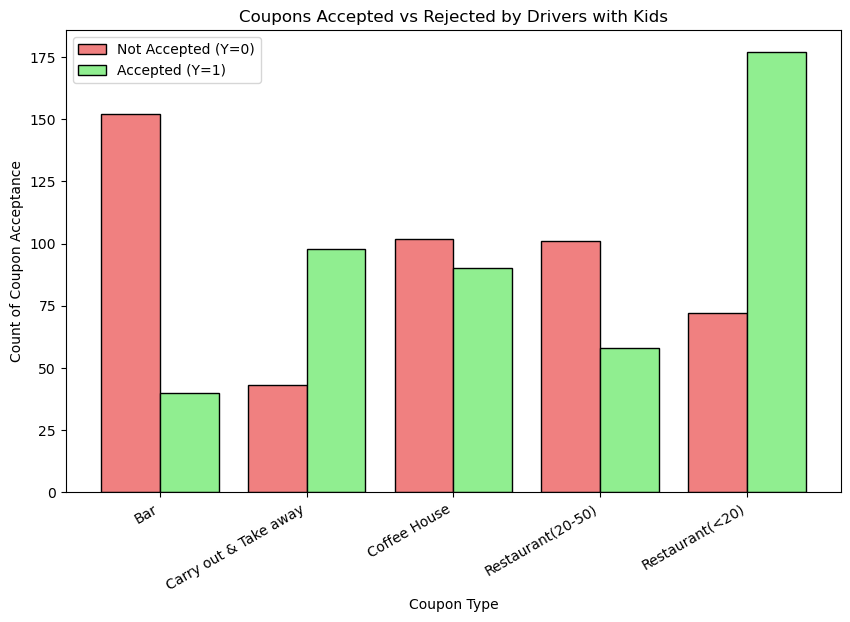

In [611]:
# Complex plots 1: What type of coupons do drivers with kids as passengers accept: Restaurents where expense per person is less than $20.

data_with_kids = data_clean[data_clean["passanger"] == "Kid(s)"]
acceptance_counts_coupons = data_with_kids.groupby(["coupon", "Y"]).size().unstack()

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4
x_labels = acceptance_counts_coupons.index
x = range(len(x_labels))

# Plot bars for Not Accepted (Y=0) and Accepted (Y=1)
ax.bar(x, acceptance_counts_coupons[0], width=bar_width, color="lightcoral", label="Not Accepted (Y=0)", edgecolor="black")
ax.bar([p + bar_width for p in x], acceptance_counts_coupons[1], width=bar_width, color="lightgreen", label="Accepted (Y=1)", edgecolor="black")


ax.set_xlabel("Coupon Type")
ax.set_ylabel("Count of Coupon Acceptance")
ax.set_title("Coupons Accepted vs Rejected by Drivers with Kids")
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(x_labels, rotation=30, ha='right')
ax.legend()
plt.show()


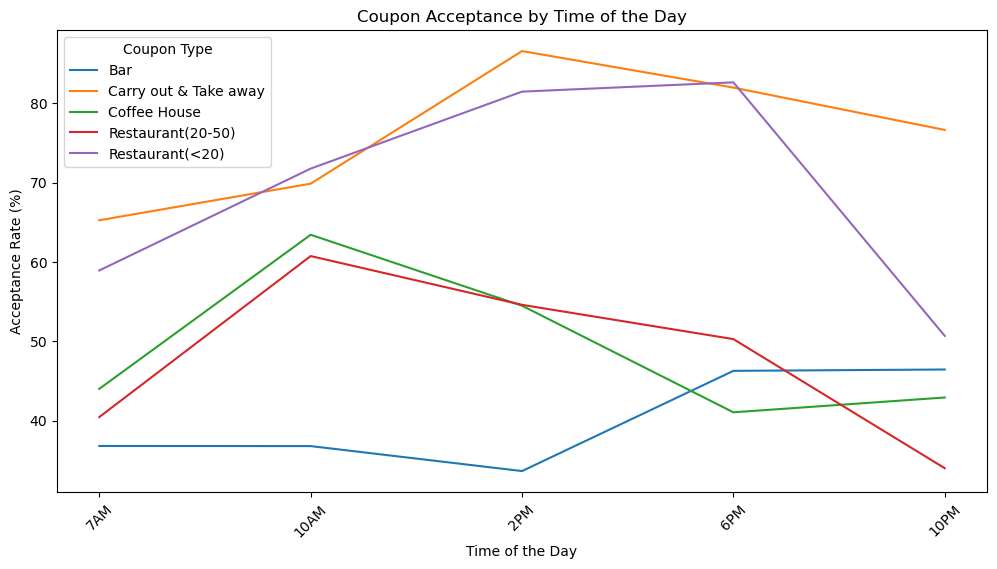

In [613]:
# Complex plot 2: What type of coupon is accepted more at different times of the day: 
# Looks like Restaurent coupons have highest rate of acceptance given any time of the day.
# Coffee house coupons get accepted more in the mornings.

time_order = ["7AM", "10AM", "2PM", "6PM", "10PM"]

grouped_data = data_clean.groupby(["time", "coupon"])["Y"].mean().unstack()
grouped_data = grouped_data.reindex(time_order)


plt.figure(figsize=(12, 6))
for coupon_type in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[coupon_type] * 100, label=coupon_type)

plt.xlabel("Time of the Day")
plt.ylabel("Acceptance Rate (%)")
plt.title("Coupon Acceptance by Time of the Day")
plt.legend(title="Coupon Type")

plt.xticks(rotation=45)
plt.show()



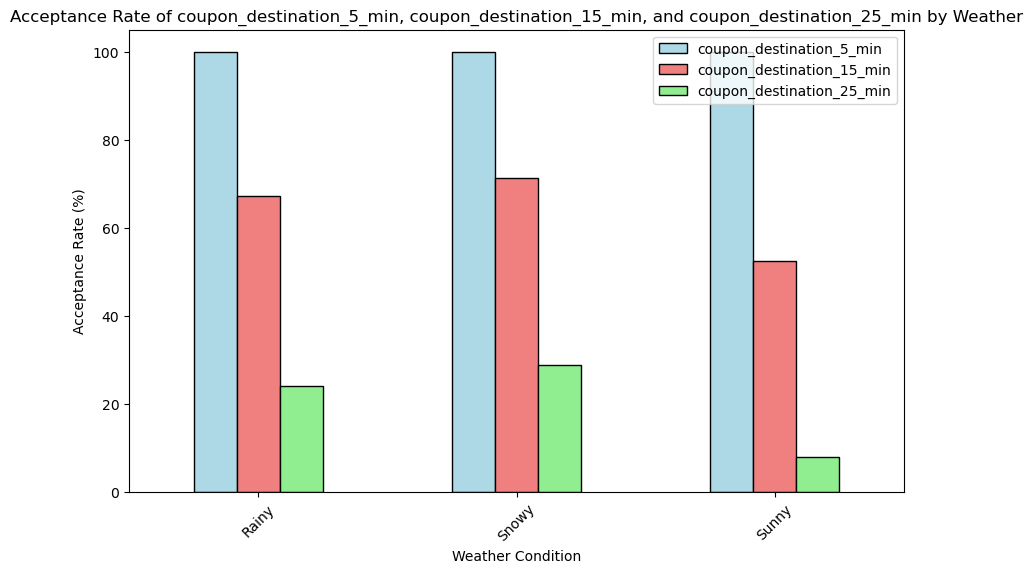

In [615]:
# Complex plot 3: What is the chance of coupon acceptance based on weather conditions and coupon destination drive time:
# Looks like almost all coupons are accepted when the destination of the coupon is within 5 minures regardless of the weather conditions.
# But longer distnace coupons 15 min and 25 min are accepted more during Rainy and Snowy weather than Sunny weather.

acceptance_rate_weather = data_clean.groupby("weather")[["toCoupon_GEQ5min", "toCoupon_GEQ15min", "toCoupon_GEQ25min"]].mean() * 100

acceptance_rate_weather.plot(kind="bar", color=['lightblue', 'lightcoral', 'lightgreen'], edgecolor="black",figsize=(10,6))

plt.xlabel("Weather Condition")
plt.ylabel("Acceptance Rate (%)")
plt.title("Acceptance Rate of coupon_destination_5_min, coupon_destination_15_min, and coupon_destination_25_min by Weather")
plt.legend(["coupon_destination_5_min", "coupon_destination_15_min", "coupon_destination_25_min"])

plt.xticks(rotation=45)
plt.show()
